In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
dataDir = thisDir + 'data/mvpa_data/'
outDir = thisDir + 'output/mL/results/ridge/permutation/'
CV=pd.read_csv(outDir+'CV/acc.csv')

In [2]:
CV.head()

,mixed,motor,mem
0,0.55,0.45,0.50
1,0.50,0.55,0.35
2,0.35,0.50,0.40
3,0.80,0.55,0.50
4,0.60,0.50,0.55


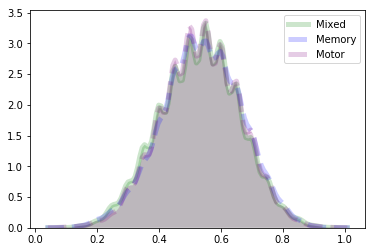

In [15]:
ax=sns.kdeplot(CV['mixed'], label='Mixed', shade=True, linewidth=5, color='Green', alpha=.2)


ax=sns.kdeplot(CV['mem'], label='Memory',shade=False, linestyle='--',  linewidth=5, color='Blue', alpha=.2)

ax=sns.kdeplot(CV['motor'], label='Motor',shade=True, linestyle='--',  linewidth=5, color='Purple', alpha=.2)




